In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [57]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url)
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
355615,ZWE,Africa,Zimbabwe,2023-11-05,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355616,ZWE,Africa,Zimbabwe,2023-11-06,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355617,ZWE,Africa,Zimbabwe,2023-11-07,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355618,ZWE,Africa,Zimbabwe,2023-11-08,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355619,ZWE,Africa,Zimbabwe,2023-11-09,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


1. The relationship between life expectancy and the number of the elderly

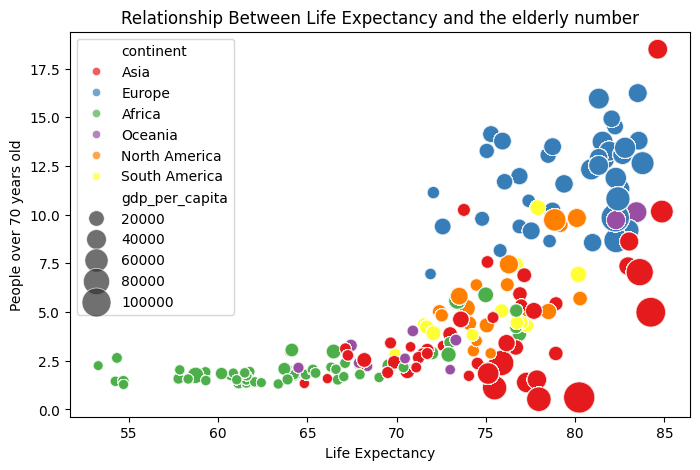

In [58]:
plt.figure(figsize=(8, 5))
scatterplot = sns.scatterplot(data=df, x='life_expectancy', y='aged_70_older', hue='continent',  size='gdp_per_capita', sizes=(50, 500), alpha=0.7, palette='Set1')

plt.title('Relationship Between Life Expectancy and the elderly number')
plt.xlabel('Life Expectancy')
plt.ylabel('People over 70 years old')
plt.legend(loc='upper left')


plt.show()

Scatterplot shows the distribution of different countries on different continents regarding life expectancy and the number of people over 70 years of age. Adding GDP as a size also reflects the relationship with the economy.

People in different countries on different continents may have different views of health and longevity for economic, social welfare, cultural and other reasons, which also affects their attitudes to disease.

Almost all European countries have a strong correlation between life expectancy and the number of people over the age of 70. Their life expectancy, number of the elderly, and GDP are among the highest level in the world.

Asian countries with higher GDP have higher life expectancy, and a few of them also have higher numbers of the elderly.
African countries generally have lower values for life expectancy, number of the elderly and GDP.

2. The correlation between population, total cases and total deaths

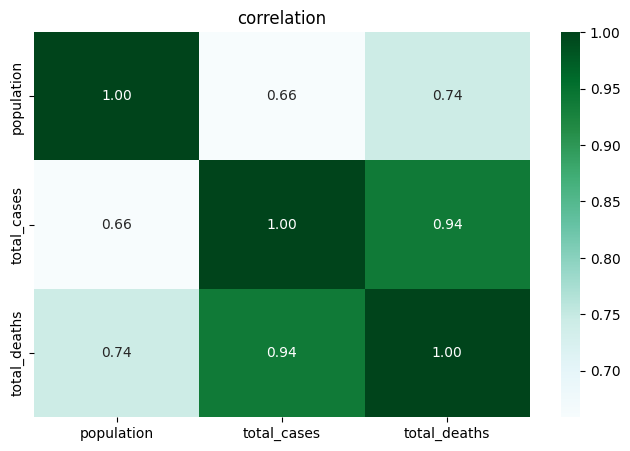

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df[['population', 'total_cases','total_deaths']].corr(), annot = True, cmap = 'BuGn',fmt='.2f')
plt.gca().set_title('correlation')
plt.show()

The heatmap shows the correlation between the different samples. Whether the population is highly correlated with the total number of cases and the total number of deaths. Whether countries with larger populations have more cases and deaths.

The total cases had the strongest correlation with the total deaths. This is followed by the population and the total deaths. Population also showed a correlation with total cases, but not as significant as the others

3. The numbers of hospital beds in different continent

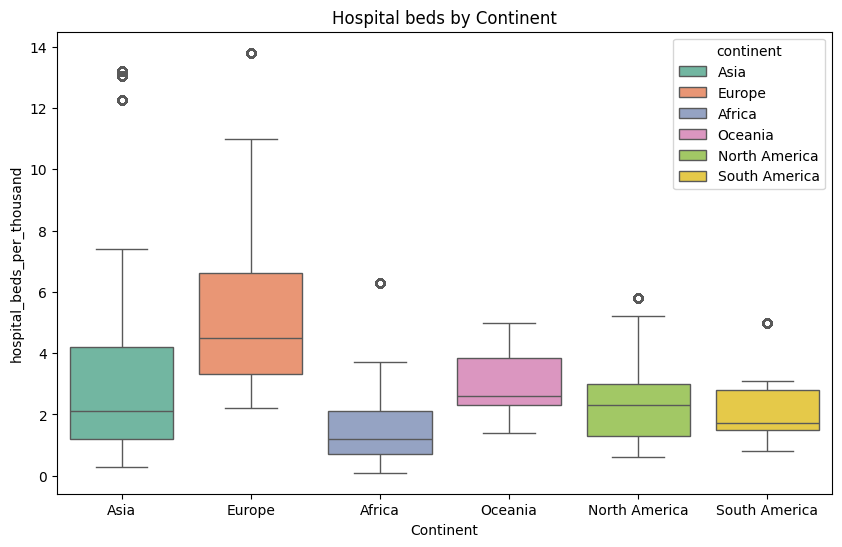

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='continent', y='hospital_beds_per_thousand', hue='continent', palette='Set2')
plt.title('Hospital beds by Continent')
plt.xlabel('Continent')
plt.ylabel('hospital_beds_per_thousand')

plt.show()


The boxplot shows the statistics of hospital beds on different continents. This includes the median number of hospital beds per continent, the range of hospital beds per capita in most countries, etc.
The ratio of hospital beds per capita affects the capacity of hospitals to treat patients, which in turn affects cure rates and mortality rates.

Europe has the highest rate of hospital beds per capita. The lowest is in Africa. Asia is at the median level, with some outliers. This means that some Asian countries have high rates of hospital beds per capita.

4. Weekly Hospital Admissions in Different Continent

In [76]:
ct = df.copy()

In [79]:
ct = ct.dropna(subset=['weekly_hosp_admissions_per_million'])

In [83]:
ct = ct.groupby('continent')['weekly_hosp_admissions_per_million'].mean().reset_index()
ct

,continent,weekly_hosp_admissions_per_million
0,Africa,74.415248
1,Asia,79.240710
2,Europe,85.320397
3,North America,114.643616
4,South America,74.506116


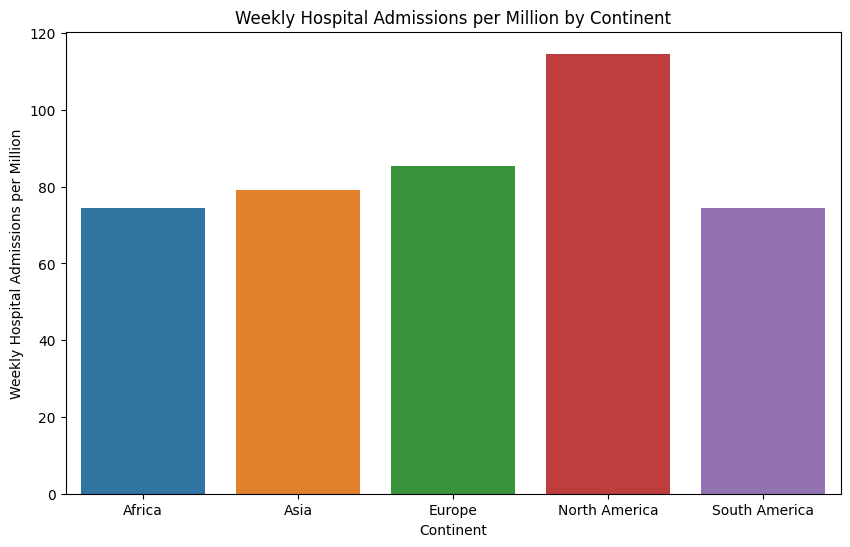

In [84]:

plt.figure(figsize=(10, 6))
sns.barplot(data=ct,x='continent',y='weekly_hosp_admissions_per_million',hue='continent')
plt.title('Weekly Hospital Admissions per Million by Continent')
plt.xlabel('Continent')
plt.ylabel('Weekly Hospital Admissions per Million')

plt.show()

Bar charts can compare weekly hospital admissions per million between continents. Countries with a high number of total cases do not automatically have a high number of total cases per million. Discover the level of hospital admissions capacity on different continents.

5. The trend of total cases in Asia countries

In [5]:
asia_cases_count = df[["date","continent", "location","total_cases","total_cases_per_million"]]
asia_cases_count2 = asia_cases_count[asia_cases_count['continent']=='Asia']
asia_cases_count2


,date,continent,location,total_cases,total_cases_per_million
0,2020-01-03,Asia,Afghanistan,NaN,NaN
1,2020-01-04,Asia,Afghanistan,NaN,NaN
2,2020-01-05,Asia,Afghanistan,NaN,NaN
3,2020-01-06,Asia,Afghanistan,NaN,NaN
4,2020-01-07,Asia,Afghanistan,NaN,NaN
...,...,...,...,...,...
352801,2023-11-05,Asia,Yemen,11945.0,354.487
352802,2023-11-06,Asia,Yemen,11945.0,354.487
352803,2023-11-07,Asia,Yemen,11945.0,354.487
352804,2023-11-08,Asia,Yemen,11945.0,354.487


In [69]:
fig = px.line(asia_cases_count2, x="date", y="total_cases", color="location")
fig.update_layout(title="Total Cases Trend by Asia Countries", xaxis_title="Year", yaxis_title="Toal Cases Count")
fig.show()

In [8]:
import datetime


In [24]:
location_list = ['China', 'Japan', 'South Korea', 'India', 'Turkey', 'Vietnam']
asia_cases_count3 = asia_cases_count2.loc[(asia_cases_count2['location'].isin(location_list))]

In [29]:
asia_cases_count3['date'] = pd.to_datetime(asia_cases_count3['date'])

date1 = pd.to_datetime('2023-11-09')
asia_cases_count3 = asia_cases_count3[asia_cases_count3['date'] == date1]
asia_cases_count3

,date,continent,location,total_cases,total_cases_per_million
63352,2023-11-09,Asia,China,99318718.0,69653.972
143430,2023-11-09,Asia,India,45001384.0,31754.331
156108,2023-11-09,Asia,Japan,33803572.0,272715.688
298171,2023-11-09,Asia,South Korea,34571873.0,667207.062
324853,2023-11-09,Asia,Turkey,17004677.0,199255.078
347377,2023-11-09,Asia,Vietnam,11624000.0,118386.518


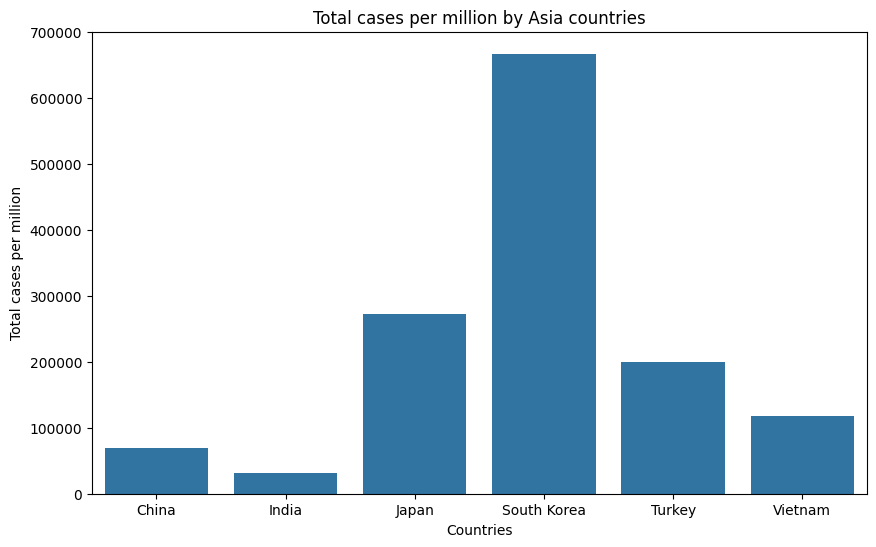

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=asia_cases_count3,x='location',y='total_cases_per_million')
plt.title('Total cases per million by Asia countries')
plt.xlabel('Countries')
plt.ylabel('Total cases per million')

plt.show()

The line graph reflects the trend of total cases in Asian countries over time. Countries with the highest total cases, the fastest growing countries, times of dramatic changes, comparisons across countries, etc. can be obtained.

Bar charts can compare total cases per million between countries. Countries with a high number of total cases do not automatically have a high number of total cases per million.

As of 11/2023, China has the highest total cases with a sharp increase at the end of 2022. However, China does not have the highest total cases per million. India, which has the second highest total cases, has the last highest total cases per million, out of the six countries with the highest total cases. South Korea has the highest total cases per million.